In [1]:
import networkx as nx
import numpy as np
from scipy.linalg import expm
import matplotlib.pyplot as plt

In [22]:
def hamiltonian(L, k, marked):
    H = L.copy().astype('complex')
    for x in marked:
        H[x,x] = H[x,x] - 1j*k 
    print(H)
    return H

def superposition(n, positions = None):
    if positions == None:
        state = np.ones([n,1])/np.sqrt(n)
    else:
        state = np.zeros([n,1])
        for x in positions:
            state[x] = 1
        state = state/np.sqrt(len(positions))
    
    return state
        
    
def evolution(H,t,initial):
    
    return np.matrix(expm(-1j*H*t)@initial)

def transport_efficiency(state):
    print(np.trace(state @ state.H))
    return 1 - np.trace(state @ state.H)

In [23]:
n = 10
k = 1
marked = [0]
t = 1

G = nx.cycle_graph(n)
L = nx.laplacian_matrix(G).todense()

H = hamiltonian(L, k, marked)
initial = superposition(n)
print(initial)

[[ 2.-1.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
  -1.+0.j]
 [-1.+0.j  2.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j -1.+0.j  2.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  2.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  2.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  2.+0.j -1.+0.j  0.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  2.+0.j -1.+0.j  0.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  2.+0.j -1.+0.j
   0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  2.+0.j
  -1.+0.j]
 [-1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j
   2.+0.j]]
[[0.31622777]
 [0.31622777]
 [0.31622777]
 [0.31622777]
 [0.31622777]
 [0.31622777]
 [0.31622777]
 [0.31622777]
 [0.31622777]
 [0.31622777]]


(1+0j)


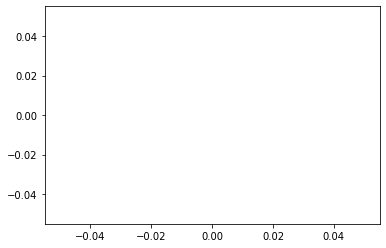

In [26]:
ti = 0
tf = 50
nt = 200
times = np.linspace(ti,tf,nt)
eta = []
for t in range(1):
    eta.append(transport_efficiency(evolution(H,t,initial)))
    
plt.plot(eta)
plt.show()